# BPL_TEST2_Batch - demo

In [1]:
run -i BPL_TEST2_Batch_explore.py

Linux - run FMU pre-comiled JModelica 2.4

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values / units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

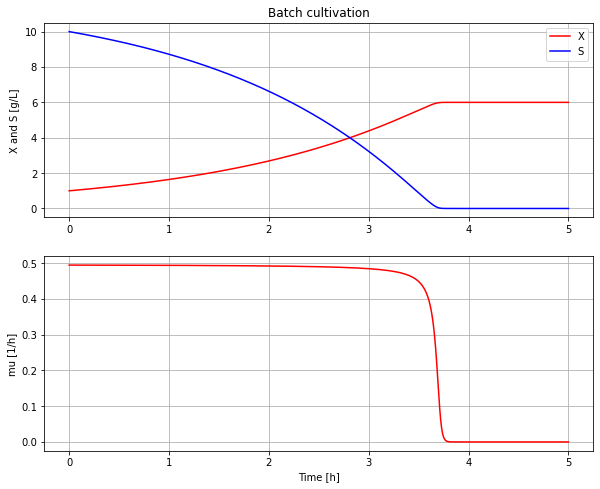

In [3]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu()

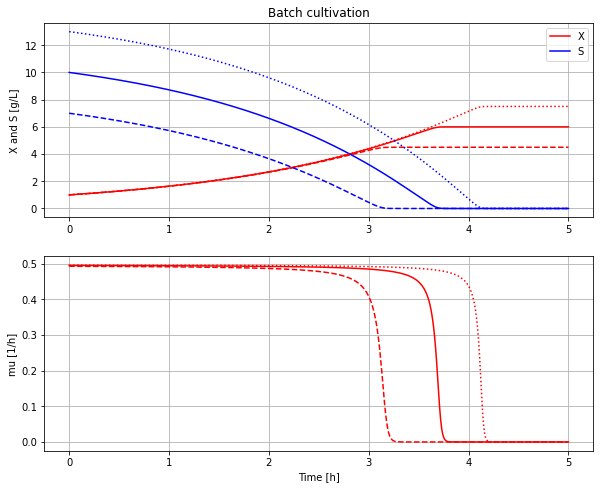

In [4]:
# Simulation were initial value of substrate VS_0 is varied
newplot(plotType='TimeSeries') 
for value in [10, 7, 13]: init(VS_0=value); simu(5)

# Restore default value of VS_0
init(VS_0=10)

In [5]:
disp('culture')

Y : 0.5
qSmax : 1.0
Ks : 0.1


In [6]:
describe('mu')

Cell specific growth rate variable : -0.0 [ 1/h ]


In [7]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'liquidphase', 'MSL']


In [8]:
describe('MSL')

MSL: 3.2.2 build 3 - used components: none


In [9]:
system_info()


System information
 -OS: Linux
 -Python: 3.8.2
 -Scipy: not installed in the notebook
 -PyFMI: 2.7.4
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: FMUModelCS2
 -Name: BPL_TEST2.Batch
 -Generated: 2022-10-17T08:53:15
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.1.0
 -Interaction: FMU-explore version 0.9.5


In [10]:
!python --version

Python 3.8.2


In [11]:
platform.python_version()

'3.8.2'